1. Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between
salary and experience with exerience in x-axis and salary in y axis.

In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [103]:
data=pd.read_csv("Salary.csv")

In [104]:
x=data['YearsExperience']
y=data['Salary']

In [105]:
n = len(x)
sum_xy = np.sum(x * y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x**2)
b= (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
a= (sum_y - b * sum_x) / n
yhat = a + b * x
mse = np.mean((y - yhat)**2)

In [106]:
print("mse:",mse)

mse: 31270951.722280975


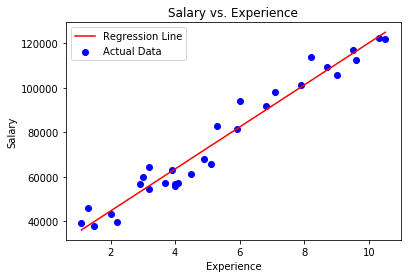

In [107]:
experience = data['YearsExperience'].values.reshape(-1, 1)
salary = data['Salary'].values
plt.scatter(x, y, label='Actual Data', color='b')
plt.plot(x, yhat, label='Regression Line', color='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Experience')
plt.legend()
plt.show()

a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph
between beta and mean squared error(MSE) for each case.

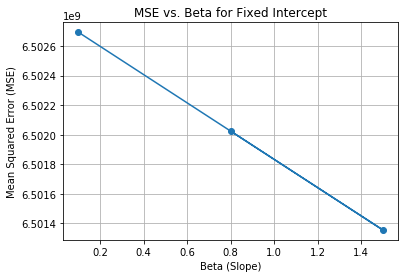

In [108]:
a=1.1

betas = [0.1, 1.5, 0.8]

mse_values = []


for b in betas:
    yhat = a + b * x
    mse = np.mean((y - yhat)**2)
    mse_values.append(mse)

plt.plot(betas, mse_values, marker='o', linestyle='-')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta for Fixed Intercept')
plt.grid(True)
plt.show()


Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between
beta and mean squared error(MSE)

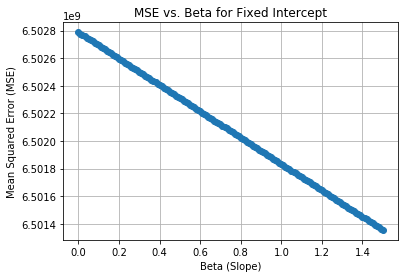

In [109]:
betas = np.arange(0, 1.51, 0.01)
a=1.1
mse_values = []
for b in betas:
    yhat = a + b * x
    mse = np.mean((y - yhat)**2)
    mse_values.append(mse)

plt.plot(betas, mse_values, marker='o', linestyle='-')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta for Fixed Intercept')
plt.grid(True)
plt.show()

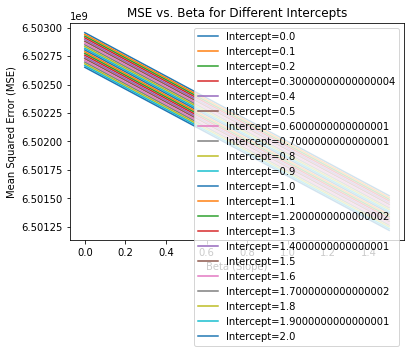

In [110]:
betas = np.arange(0, 1.51, 0.01)

mse_values = {}

for a in np.arange(0, 2.1, 0.1):
    mse_intercept = []  
    
    for b in betas:
        yhat = a + b * x
        mse = np.mean((y - yhat)**2)
        mse_intercept.append(mse)  
        
    mse_values[a] = mse_intercept


for a, mse_intercept in mse_values.items():
    plt.plot(betas, mse_intercept, label=f'Intercept={a}')  

plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta for Different Intercepts')
plt.legend()
plt.show()

Use the scikit learn and compare the results of MSE.

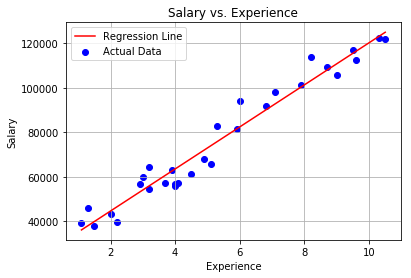

Coefficient (slope): 9449.962321455074
Intercept: 25792.20019866871
mse: 31270951.722280968


In [111]:
model = LinearRegression()
x=data['YearsExperience'].values.reshape(-1,1)
model.fit(x, y)
predicted_salary = model.predict(x)
plt.scatter(x, y, label='Actual Data', color='b')
plt.plot(x, predicted_salary, label='Regression Line', color='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Experience')
plt.legend()
plt.grid(True)
plt.show()
slope = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient (slope): {slope}')
print(f'Intercept: {intercept}')
predicted_salary = model.predict(x)
mse = mean_squared_error(y, predicted_salary)
print('mse:',mse)


2. Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error
for 60 iterations of 5 epochs.
a. Plot the graph of error versus iteration.
b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.
c. Plot the graph between beta (X-axis) and error (Y-axis) using scikit learn and your approach separately.

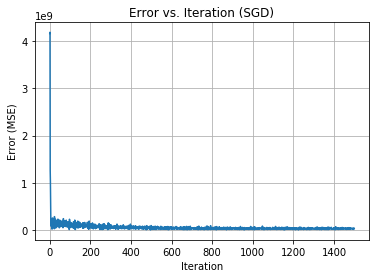

Final B0: 24838.986186889782
Final B1: 9644.82042289856
Final Error (MSE): 37822497.400318146


In [112]:
data = pd.read_csv("Salary.csv")
x = data['YearsExperience']
y = data['Salary']
learning_rate = 0.01
num_iterations = 60
num_epochs = 5
batch_size = len(x) // num_epochs

B0 = np.random.rand()
B1 = np.random.rand()

errors = []


for iteration in range(num_iterations):
    for epoch in range(num_epochs):

        indices = np.random.permutation(len(x))
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        for i in range(0, len(x_shuffled), batch_size):
         
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
       
            y_pred = B0 + B1 * x_batch
 
            error = np.mean((y_pred - y_batch) ** 2)
            errors.append(error)
            
            gradient_B0 = np.mean(y_pred - y_batch)
            gradient_B1 = np.mean((y_pred - y_batch) * x_batch)
            
            B0 -= learning_rate * gradient_B0
            B1 -= learning_rate * gradient_B1

plt.plot(range(len(errors)), errors)
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')
plt.title('Error vs. Iteration (SGD)')
plt.grid(True)
plt.show()

final_error = errors[-1]
print(f'Final B0: {B0}')
print(f'Final B1: {B1}')
print(f'Final Error (MSE): {final_error}')


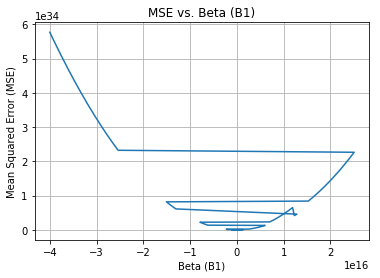

In [113]:

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv("Salary.csv")
x = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary']

beta_values = np.linspace(-10000, 10000, 400)
mse_values = []
B1_values = []

min_eta0 = 0.001

for beta in beta_values:
    sgd_regressor = SGDRegressor(max_iter=60, tol=None, random_state=0, learning_rate='constant', eta0=max(min_eta0, beta))
    
    for _ in range(5):
        sgd_regressor.partial_fit(x, y)

    B1 = sgd_regressor.coef_[0]
    B1_values.append(B1)

    y_pred = sgd_regressor.predict(x)

    error = mean_squared_error(y, y_pred)
    
    mse_values.append(error)

plt.plot(B1_values, mse_values)
plt.xlabel('Beta (B1)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta (B1)')
plt.grid(True)
plt.show()


Apply scikit learn model for Simple Linear regression using SGD of the given Salary_Data.csv dataset, and arrive at
different values of B0, B1 and error for varying iterations. Plot the graph of epoch(X-axis) versus error(Y-axis).

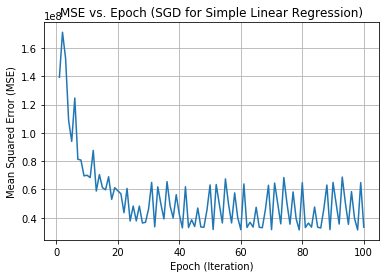

Final B0: 25879.0561307595
Final B1: 9671.866764175616
Final Error (MSE): 33256828.67760933


In [114]:
max_iterations = 100  
learning_rate = 0.01

B0_values = []
B1_values = []
error_values = []

sgd_regressor = SGDRegressor(max_iter=1, tol=None, random_state=0, learning_rate='constant', eta0=learning_rate)

for iteration in range(1, max_iterations + 1):
    sgd_regressor.max_iter = iteration
    sgd_regressor.fit(x, y)
    B0 = sgd_regressor.intercept_[0]
    B1 = sgd_regressor.coef_[0]
    y_pred = sgd_regressor.predict(x)
    error = mean_squared_error(y, y_pred)
    
    B0_values.append(B0)
    B1_values.append(B1)
    error_values.append(error)

plt.plot(range(1, max_iterations + 1), error_values)
plt.xlabel('Epoch (Iteration)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Epoch (SGD for Simple Linear Regression)')
plt.grid(True)
plt.show()

final_error = error_values[-1]
final_B0 = B0_values[-1]
final_B1 = B1_values[-1]
print(f'Final B0: {final_B0}')
print(f'Final B1: {final_B1}')
print(f'Final Error (MSE): {final_error}')